In [2]:
!pip install pycaret

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [9]:
dataset = pd.read_csv('/users/he145100/vw_emergency_episode_10000_less_fields.csv')

C:\Users\he145100\AppData\Local\Temp\ipykernel_32240\1011593668.py:1: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv('/users/he145100/vw_emergency_episode_10000_less_fields.csv')


In [10]:
dataset.shape

(10000, 64)

In [11]:
data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (9500, 64)
Unseen Data For Predictions: (500, 64)


In [12]:
from pycaret.classification import *

In [14]:
admission_test_1 = setup(data = data, target = 'admission', session_id=123) 

,Description,Value
0,session_id,123
1,Target,admission
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(9500, 64)"
5,Missing Values,True
6,Numeric Features,5
7,Categorical Features,58
8,Ordinal Features,False
9,High Cardinality Features,False


In [15]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.8568,0.9286,0.6850,0.7640,0.7217,0.6258,0.6279,8.6260
lightgbm,Light Gradient Boosting Machine,0.8540,0.9258,0.6878,0.7534,0.7184,0.6202,0.6219,0.1430
catboost,CatBoost Classifier,0.8529,0.9248,0.6351,0.7831,0.7008,0.6048,0.6110,2.7240
ada,Ada Boost Classifier,0.8424,0.9146,0.6374,0.7458,0.6866,0.5823,0.5860,0.9940
gbc,Gradient Boosting Classifier,0.8392,0.9102,0.5715,0.7777,0.6578,0.5562,0.5680,3.3850
ridge,Ridge Classifier,0.8373,0.0000,0.6124,0.7446,0.6716,0.5648,0.5700,0.4420
et,Extra Trees Classifier,0.8371,0.9007,0.5443,0.7921,0.6445,0.5436,0.5601,1.5720
rf,Random Forest Classifier,0.8261,0.8990,0.4945,0.7863,0.6066,0.5025,0.5251,0.9730
dt,Decision Tree Classifier,0.7986,0.7425,0.6196,0.6330,0.6256,0.4880,0.4885,0.3210
lr,Logistic Regression,0.7284,0.5038,0.0000,0.0000,0.0000,0.0000,0.0000,1.1210


In [16]:
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8421,0.9154,0.7056,0.7095,0.7075,0.5994,0.5994
1,0.8511,0.9284,0.6833,0.7455,0.7130,0.6128,0.6138
2,0.8707,0.9340,0.7444,0.7701,0.7571,0.6690,0.6692
3,0.8511,0.9229,0.6630,0.7595,0.7080,0.6087,0.6112
4,0.8346,0.9178,0.5967,0.7448,0.6626,0.5548,0.5608
5,0.8466,0.9223,0.6575,0.7484,0.7000,0.5975,0.5998
6,0.8602,0.9254,0.7348,0.7472,0.7409,0.6452,0.6452
7,0.8767,0.9391,0.7293,0.8000,0.7630,0.6799,0.6812
8,0.8496,0.9242,0.6685,0.7516,0.7076,0.6069,0.6087


In [17]:
print(lightgbm)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [18]:
tuned_lightgbm = tune_model(lightgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8436,0.9088,0.6833,0.7235,0.7029,0.5969,0.5973
1,0.8271,0.9115,0.6056,0.7124,0.6547,0.5403,0.5435
2,0.8511,0.9177,0.6611,0.7580,0.7062,0.6072,0.6097
3,0.8421,0.9135,0.6022,0.7676,0.6749,0.5727,0.5800
4,0.8165,0.9017,0.5470,0.7122,0.6188,0.5007,0.5082
5,0.8496,0.9108,0.6575,0.7580,0.7041,0.6040,0.6068
6,0.8421,0.9068,0.6575,0.7346,0.6939,0.5879,0.5896
7,0.8541,0.9263,0.6519,0.7763,0.7087,0.6124,0.6166
8,0.8436,0.9110,0.6188,0.7619,0.6829,0.5806,0.5861


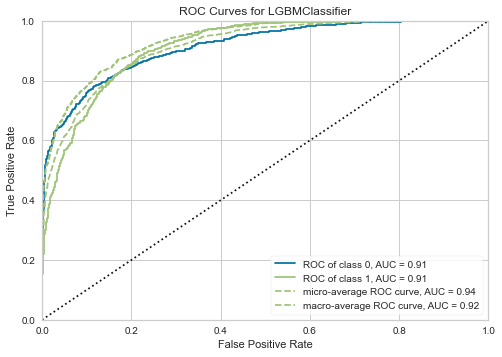

In [20]:
plot_model(tuned_lightgbm, plot = 'auc')

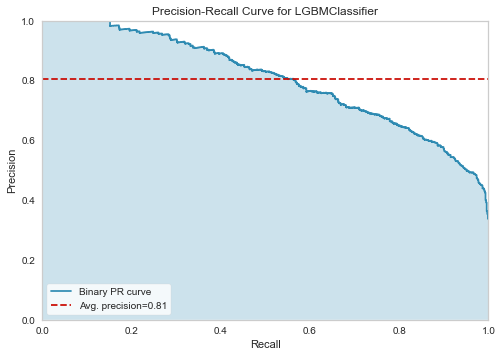

In [21]:
plot_model(tuned_lightgbm, plot = 'pr')

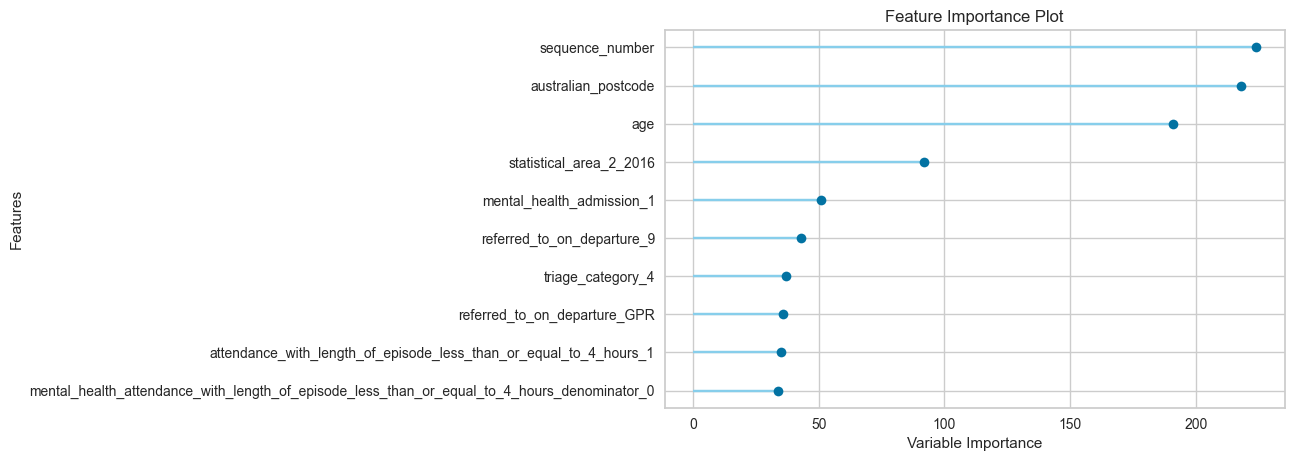

In [22]:
plot_model(tuned_lightgbm, plot='feature')

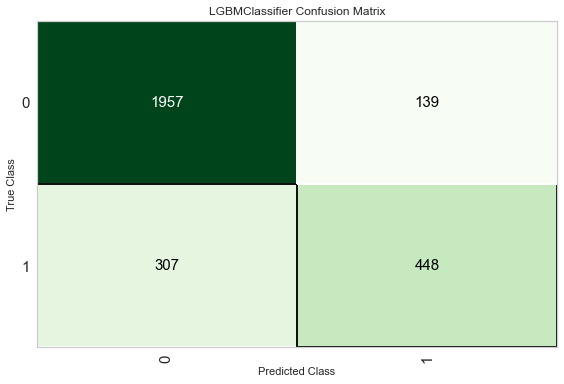

In [23]:
plot_model(tuned_lightgbm, plot = 'confusion_matrix')

In [24]:
evaluate_model(tuned_lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [25]:
predict_model(tuned_lightgbm)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8436,0.9148,0.5934,0.7632,0.6677,0.5675,0.5751


,sequence_number,occupation,statistical_area_2_2016,australian_postcode,age,establishment_code_101,establishment_code_104,establishment_code_105,establishment_code_106,establishment_code_107,...,remoteness_area_2016_0.0,remoteness_area_2016_1.0,remoteness_area_2016_2.0,remoteness_area_2016_3.0,remoteness_area_2016_4.0,remoteness_area_2016_not_available,emergency_department_information_system_covid19_flag_1,admission,Label,Score
0,1.101092e+09,114.712578,507011168.0,6163.0,13.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9107
1,1.101099e+09,114.712578,505021088.0,6061.0,74.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.6349
2,1.101096e+09,98.000000,503021056.0,6003.0,48.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.8550
3,1.101098e+09,114.712578,505011072.0,6027.0,14.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9289
4,1.101098e+09,114.712578,507051200.0,6171.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2846,1.101096e+09,114.712578,506021120.0,6104.0,31.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9953
2847,1.101094e+09,114.712578,504011040.0,6053.0,17.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9708
2848,1.101097e+09,114.712578,501031008.0,6255.0,76.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0.6739
2849,1.101094e+09,114.712578,100000000.0,97.0,21.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.9518


In [26]:
final_lightgbm = finalize_model(tuned_lightgbm)

In [27]:
#Final Random Forest model parameters for deployment
print(final_lightgbm)

LGBMClassifier(bagging_fraction=0.6, bagging_freq=2, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.4,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=41, min_child_weight=0.001, min_split_gain=0.9,
               n_estimators=260, n_jobs=-1, num_leaves=70, objective=None,
               random_state=123, reg_alpha=2, reg_lambda=3, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [29]:
unseen_predictions = predict_model(final_lightgbm, data=data_unseen)
unseen_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8340,0.9335,0.5949,0.8319,0.6937,0.5841,0.5996


,establishment_code,sequence_number,sex,ethnicity,marital_status,interpreter_required,employment_status,occupation,triage_category,visit_type,...,self_harm_attendance,suicide_attempt_or_at_risk_of_suicide,mental_health_consult,age,department_of_veteran_affairs_card_colour,remoteness_area_2011,remoteness_area_2016,emergency_department_information_system_covid19_flag,Label,Score
0,277,1101101947,1,4,5,2,7.0,NaN,4,1,...,0,0,NaN,83,9,0.0,0.0,0,0,0.9947
1,101,1101101934,2,4,1,2,4.0,NaN,3,1,...,0,0,NaN,46,9,1.0,1.0,0,0,0.9930
2,106,1101101915,2,4,3,2,2.0,NaN,3,1,...,0,0,NaN,47,9,NaN,0.0,0,0,0.9943
3,107,1101101913,1,4,1,2,1.0,NaN,4,1,...,0,0,NaN,1,9,0.0,0.0,0,0,0.9811
4,645,1101101895,2,4,1,2,8.0,NaN,4,1,...,0,0,NaN,48,9,0.0,0.0,0,0,0.9431


In [31]:
from pycaret.utils import check_metric
check_metric(unseen_predictions['admission'], unseen_predictions['Label'], metric = 'Accuracy')

0.834